
## 回家作業
- 請將資料清理乾淨以後，將資料存入資料庫 SQLite 之中,接者從SQLIte 取出資料後嘗試回答以下問題:

- 請使用pie 圖列出哪個縣市(city)的物件最多

- 請使用長條圖列出哪個縣市(city)的物件最多
- 請使用繪製每坪單價的直方圖
- 請使用繪製每坪單價的箱型圖
- 請使用繪製坪數與單價的散佈圖

In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv',index_col=0)

In [0]:
df['price'] = df['price'].map(lambda e: int(e.replace('元/月', '').replace(',','')))

In [11]:
s = '花蓮縣玉里鎮忠智路172號'
import re
m = re.match('(.+[市縣]).+', s)
m.group(1)

'花蓮縣'

In [12]:
s = '花蓮縣花蓮市林森路33號'
import re
m = re.match('(.+[市縣]).+', s)
m.group(1)

'花蓮縣花蓮市'

In [13]:
s = '花蓮縣花蓮市林森路33號'
import re
m = re.match('(.+?[市縣]).+', s)
m.group(1)

'花蓮縣'

In [0]:
# ? 放在一般字元後面 => {0,1}
# ? 放在+, *, ?後面 => 非貪婪比對

In [0]:
# (XX市)XX區XX路
# \u4e00-\u9fa5
#df['address'].str.extract('(.+?[市縣]).+')
df['city'] = df['address'].str.extract('([\u4e00-\u9fa5]+?[市縣]).+')

In [19]:
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude,city
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,4500,NaN,6.0,透天厝/獨立套房,22.878436,120.250810,高雄市
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,7500,NaN,10.0,透天厝/獨立套房,25.081558,121.461868,新北市
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,11000,NaN,8.0,電梯大樓/分租套房,25.010293,121.511328,新北市
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,5000,NaN,8.0,透天厝/獨立套房,22.551346,120.538032,屏東縣
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,5000,NaN,7.0,透天厝/分租套房,25.043652,121.141518,桃園市


In [0]:
import sqlite3 as lite
with lite.connect('house.sqlite') as con:
  df.to_sql('rent591', con= con, if_exists='replace')

In [0]:
import sqlite3 as lite
with lite.connect('house.sqlite') as con:
  df2 = pd.read_sql_query('select city, count(*) as city_cnt from rent591 group by city', con= con)

In [28]:
df2.set_index('city', drop=True, inplace=True)
df2.head()

,city_cnt
city,
南投縣,194
台中市,11754
台北市,17168
台南市,3964
台東縣,129


In [31]:
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2020-05-23 02:10:06--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c00::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  39.1MB/s    in 3.0s    

2020-05-23 02:10:10 (39.1 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]



In [32]:
! unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  inflating: NotoSansMonoCJKtc-Bold.otf  
  inflating: NotoSansMonoCJKtc-Regular.otf  
  inflating: README                  


In [0]:
!mv NotoSansCJKtc-Regular.otf /usr/share/fonts/truetype/

In [0]:

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/NotoSansCJKtc-Regular.otf'
fontprop = fm.FontProperties(fname=path)

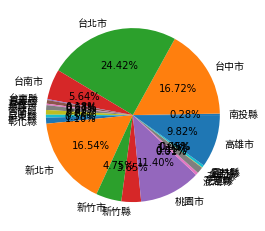

In [42]:
patches,l_text,p_text = plt.pie(df2['city_cnt'], labels=df2.index, autopct="%1.2f%%")
for t in l_text: 
	t.set_fontproperties(fontprop)

In [0]:
df2 = df2.sort_values('city_cnt', ascending = False)

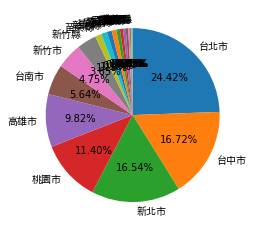

In [49]:
patches,l_text,p_text = plt.pie(df2['city_cnt'], labels=df2.index, autopct="%1.2f%%", startangle = 90, counterclock=False)
for t in l_text: 
	t.set_fontproperties(fontprop)

In [0]:
? plt.pie

In [56]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Pie(labels=df2.index, values=df2['city_cnt']))
fig.show()

([<matplotlib.axis.XTick at 0x7f72fbc65b38>,
 [Text(0, 0, '台北市'),
  Text(0, 0, '台中市'),
  Text(0, 0, '新北市'),
  Text(0, 0, '桃園市'),
  Text(0, 0, '高雄市'),
  Text(0, 0, '台南市'),
  Text(0, 0, '新竹市'),
  Text(0, 0, '新竹縣'),
  Text(0, 0, '苗栗縣'),
  Text(0, 0, '彰化縣'),
  Text(0, 0, '基隆市'),
  Text(0, 0, '宜蘭縣'),
  Text(0, 0, '嘉義市'),
  Text(0, 0, '屏東縣'),
  Text(0, 0, '花蓮縣'),
  Text(0, 0, '雲林縣'),
  Text(0, 0, '南投縣'),
  Text(0, 0, '嘉義縣'),
  Text(0, 0, '台東縣'),
  Text(0, 0, '金門縣'),
  Text(0, 0, '澎湖縣')])

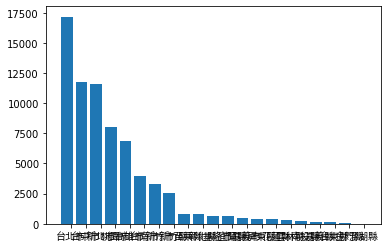

In [55]:
plt.bar(height = df2['city_cnt'], x=df2.index)
width = 0.3
x = range(len(df2.index))
plt.xticks([i+width for i in x],df2.index, fontproperties=fontprop)

In [58]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Bar(x=df2.index, y=df2['city_cnt']))
fig.show()

In [0]:
import sqlite3 as lite
with lite.connect('house.sqlite') as con:
  df3 = pd.read_sql_query("select building_area, price, price/building_area as price_per_area from rent591 where city = '台北市'", con= con)

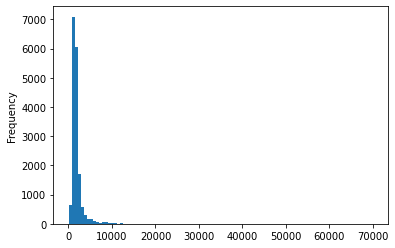

In [103]:
df3['price_per_area'].plot(kind='hist', bins = 100)

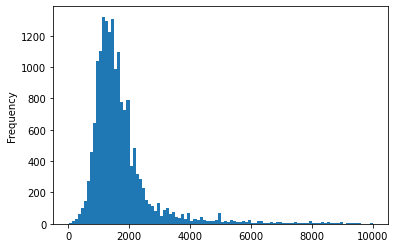

In [104]:
df3[df3['price_per_area'] < 10000]['price_per_area'].plot(kind='hist', bins = 100)

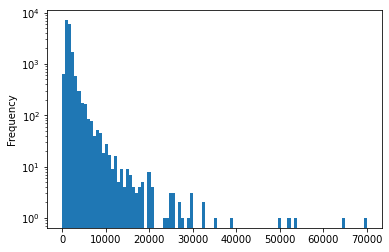

In [105]:
df3['price_per_area'].plot(kind='hist', logy=True, bins = 100)

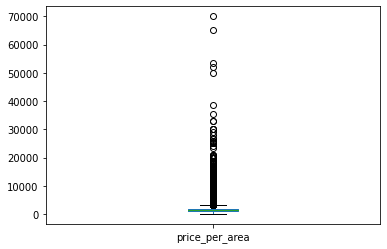

In [106]:
df3['price_per_area'].plot(kind='box')

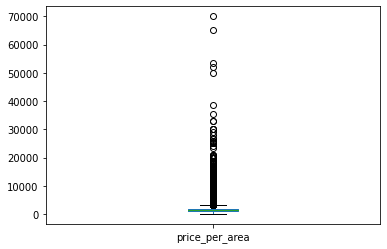

In [107]:
df3[df3['price_per_area'] < 100000]['price_per_area'].plot(kind='box')

In [108]:
df3.head()

,building_area,price,price_per_area
0,6.00,10000,1666.666667
1,78.00,25000,320.512821
2,66.35,70000,1055.011304
3,6.00,8000,1333.333333
4,26.00,14000,538.461538


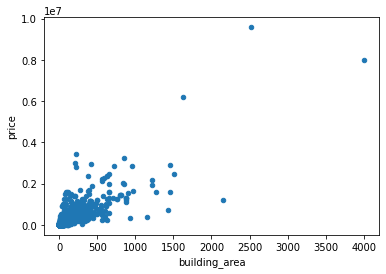

In [109]:
df3.plot(x = 'building_area', y = 'price', kind = 'scatter')

In [0]:
df3 = df3[df3['building_area'] <= 2000]

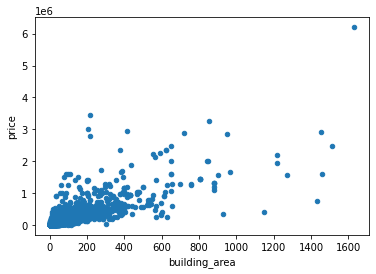

In [111]:
df3.plot(x = 'building_area', y = 'price', kind = 'scatter')

In [114]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(df3[['building_area']], df3['price'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predicted = clf.predict(df3[['building_area']])

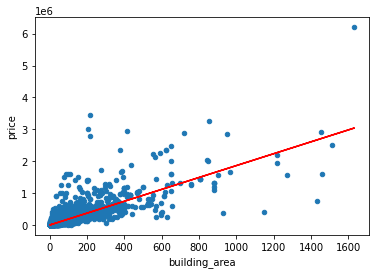

In [122]:
df3.plot(x = 'building_area', y = 'price', kind = 'scatter')
plt.plot(df3['building_area'], predicted, color = 'r')

In [124]:
import numpy
clf.predict(numpy.array([[20]]))

array([33137.72521324])

## 迴歸分析

In [0]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col = 0)


In [127]:
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [0]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values
#Y

Text(0, 0.5, 'salary')

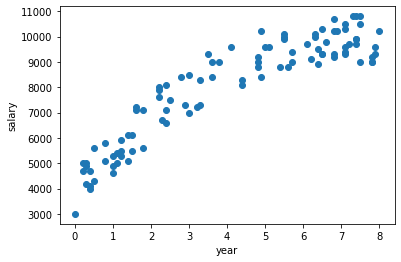

In [133]:
plt.scatter(X,Y)
plt.xlabel('year')
plt.ylabel('salary')

In [0]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [136]:
clf.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [137]:
# salary = year * 712 + 5049
clf.coef_

array([712.59413615])

In [138]:
clf.intercept_

5049.0098998138365

In [139]:
5 * 712 + 5049

8609

In [141]:
import numpy as np
clf.predict(np.array([ [5],[10] ]))

array([ 8611.98058054, 12174.95126127])

In [143]:
print('Coefficients:', clf.coef_)
print('Intercept:', clf.intercept_)

Coefficients: [712.59413615]
Intercept: 5049.0098998138365


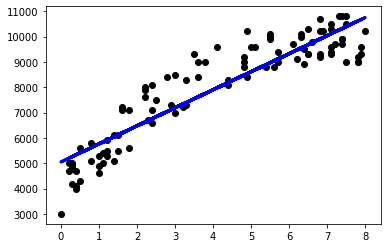

In [144]:
plt.scatter(X, Y, color='black')
plt.plot(X, clf.predict(X), color='blue', linewidth=3)
plt.show()

In [0]:
# y = ax ^ 2 + bx + c
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)


In [147]:
X.head()

,year
1,2.4
2,5.5
3,3.3
4,0.2
5,1.5


In [149]:
X_[0:3,:]

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  5.5 , 30.25],
       [ 1.  ,  3.3 , 10.89]])

In [150]:
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

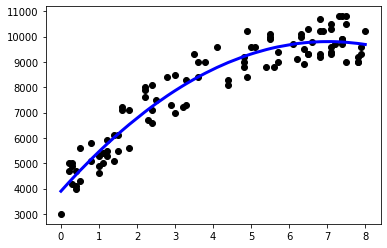

In [154]:
plt.scatter(X, Y, color='black')
poly = PolynomialFeatures(degree=2)
X2 = X.sort_values(['year'])
X2_ = poly.fit_transform(X2)
plt.plot(X2, regr.predict(X2_), linewidth = 3, color="blue")
plt.show()

In [175]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/house-prices.csv')
df.head(3)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [177]:
df['Neighborhood'].unique()

array(['East', 'North', 'West'], dtype=object)

In [178]:
df['Brick'].unique()

array(['No', 'Yes'], dtype=object)

In [0]:
brick = pandas.get_dummies(df['Brick'])
del brick['No']

In [180]:
brick.head()

,Yes
0,0
1,0
2,0
3,0
4,0


In [182]:
df['Neighborhood'].head()

0    East
1    East
2    East
3    East
4    East
Name: Neighborhood, dtype: object

In [181]:
neighborhood = pandas.get_dummies(df['Neighborhood'])
neighborhood.head()

,East,North,West
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [0]:
del neighborhood['West']
neighborhood.head()

In [0]:
house = pandas.concat([df,brick,neighborhood], axis = 1)
del house['Brick']
del house['Neighborhood']

In [168]:
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,1,114300,1790,2,2,2,0,1,0
1,2,114200,2030,4,2,3,0,1,0
2,3,114800,1740,3,2,1,0,1,0
3,4,94700,1980,3,2,3,0,1,0
4,5,119800,2130,3,3,3,0,1,0


In [170]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes','East','North']]
Y = house['Price'].values
regr.fit(X,Y)
regr.predict(X.head())

array([103182.88325028, 116127.48050967, 113047.47841973, 109230.99957752,
       125063.33919194])

In [172]:
house['Yes'].value_counts()

0    86
1    42
Name: Yes, dtype: int64

In [183]:
regr.coef_

array([    52.99374081,   4246.79389165,   7883.27849293,  -8267.48831831,
        17297.34952752, -22241.61647014, -20681.03735068])

In [0]:
predicted = regr.predict(X)

In [191]:
((predicted - Y) ** 2).sum() / len(predicted)

94105539.9460302

In [184]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 23 May 2020   Prob (F-statistic):           8.25e-50
Time:                        05:52:14   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.284e+04   1.02e+04      2.231      0.0

In [0]:
predictorcols = list(X.columns)

In [0]:
import itertools
#list(itertools.combinations(predictorcols,3))

In [202]:
len(predictorcols)

7

In [0]:
AICs = {}
for k in range(1, 7 + 1):
  for variables in itertools.combinations(predictorcols,k):
    #print(variables)
    predictors = X[list(variables)]
    predictors2 = sm.add_constant(predictors)
    est = sm.OLS(Y, predictors2)
    res = est.fit()
    AICs[variables] = res.aic

In [0]:
from collections import Counter
c = Counter(AICs)

In [217]:
c.most_common()[:-10:-1]

[(('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'),
  2729.318981401249),
 (('SqFt', 'Bathrooms', 'Offers', 'Yes', 'East', 'North'), 2734.639925628371),
 (('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East', 'North'), 2741.3156609981506),
 (('SqFt', 'Offers', 'Yes', 'East', 'North'), 2748.8490492259953),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East'),
  2766.624649944451),
 (('SqFt', 'Bathrooms', 'Yes', 'East', 'North'), 2776.9030655919946),
 (('SqFt', 'Bedrooms', 'Bathrooms', 'Yes', 'East', 'North'),
  2777.849673430561),
 (('SqFt', 'Bedrooms', 'Offers', 'Yes', 'East'), 2779.7703894909137),
 (('SqFt', 'Bedrooms', 'Yes', 'East', 'North'), 2783.144374438954)]

## 使用591數據建立房價預測模型

### 資料讀取

In [0]:
house = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv', index_col = 0)

In [221]:
house.head()

,id,address,floor,allfloor,layout,area,price,browsenum_all
0,6032971,永康街47巷永康街五樓頂加..,5,5,5房3廳3衛,46.8,"60,000",751
1,6054083,仁愛路四段仁愛路樹海景觀..,7,12,4房2廳2衛,76.9,"100,000",162
2,5957980,光復南路高樓層大巨蛋正對..,10,13,4房2廳2衛,71.3,"150,000",2385
3,6043839,永康街23巷永康商圈..,3,4,2房1廳1衛,18.0,"29,000",1323
4,5181793,雲和街師大*已收訂..,5,5,2房2廳1衛,28.0,"31,800",2303


In [222]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             720 non-null    int64  
 1   address        720 non-null    object 
 2   floor          720 non-null    int64  
 3   allfloor       720 non-null    int64  
 4   layout         720 non-null    object 
 5   area           720 non-null    float64
 6   price          720 non-null    object 
 7   browsenum_all  720 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 50.6+ KB


### 資料預處理

In [0]:
house[['bedroom', 'livingroom', 'bathroom']] = house['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')

In [0]:
house['price'] = house['price'].map(lambda e: int(e.replace(',', '')))

In [229]:
house.columns

Index(['id', 'address', 'floor', 'allfloor', 'layout', 'area', 'price',
       'browsenum_all', 'bedroom', 'livingroom', 'bathroom'],
      dtype='object')

In [0]:
house = house[['floor', 'allfloor', 'area', 
       'bedroom', 'livingroom', 'bathroom','price']]

In [231]:
house.head()

,floor,allfloor,area,bedroom,livingroom,bathroom,price
0,5,5,46.8,5,3,3,60000
1,7,12,76.9,4,2,2,100000
2,10,13,71.3,4,2,2,150000
3,3,4,18.0,2,1,1,29000
4,5,5,28.0,2,2,1,31800


In [236]:
house.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [237]:
house['bedroom'] = house['bedroom'].astype(int)
house['livingroom'] = house['livingroom'].astype(int)
house['bathroom'] = house['bathroom'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [238]:
house.head()

,floor,allfloor,area,bedroom,livingroom,bathroom,price
0,5,5,46.8,5,3,3,60000
1,7,12,76.9,4,2,2,100000
2,10,13,71.3,4,2,2,150000
3,3,4,18.0,2,1,1,29000
4,5,5,28.0,2,2,1,31800


In [239]:
from sklearn.linear_model import LinearRegression
X = house.iloc[:,:-1]
Y = house.iloc[:,-1].values
clf = LinearRegression()
clf.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predicted = clf.predict(X)

In [243]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y,predicted)

442790407.9910531

In [244]:
r2_score(Y,predicted)

0.690476404252544

In [245]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     262.1
Date:                Sat, 23 May 2020   Prob (F-statistic):          8.83e-176
Time:                        06:36:04   Log-Likelihood:                -8097.7
No. Observations:                 712   AIC:                         1.621e+04
Df Residuals:                     705   BIC:                         1.624e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5846.5997   3721.958      1.571      0.1

In [0]:
predictorcols = list(X.columns)

In [0]:
AICs = {}
for k in range(1, len(predictorcols) + 1):
  for variables in itertools.combinations(predictorcols,k):
    #print(variables)
    predictors = X[list(variables)]
    predictors2 = sm.add_constant(predictors)
    est = sm.OLS(Y, predictors2)
    res = est.fit()
    AICs[variables] = res.aic

In [0]:
from collections import Counter
c = Counter(AICs)

In [250]:
c.most_common()[:-10:-1]

[(('floor', 'area', 'bedroom', 'bathroom'), 16205.695391186993),
 (('floor', 'allfloor', 'area', 'bedroom', 'bathroom'), 16207.590221620825),
 (('floor', 'area', 'bedroom', 'livingroom', 'bathroom'), 16207.593620755726),
 (('floor', 'allfloor', 'area', 'bedroom', 'livingroom', 'bathroom'),
  16209.49672391596),
 (('floor', 'area', 'bedroom'), 16221.25220004545),
 (('floor', 'area', 'bedroom', 'livingroom'), 16222.416654679733),
 (('floor', 'allfloor', 'area', 'bedroom'), 16223.176836987579),
 (('floor', 'allfloor', 'area', 'bedroom', 'livingroom'), 16224.359733240477),
 (('area', 'bedroom', 'bathroom'), 16224.386860704937)]

In [251]:
from sklearn.linear_model import LinearRegression
X = house[['floor', 'area', 'bedroom', 'bathroom']]
Y = house.iloc[:,-1].values
clf = LinearRegression()
clf.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predicted = clf.predict(X)

In [253]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y,predicted)

442913975.73804635

In [255]:
r2_score(Y,predicted)

0.6903900267414742

In [256]:
from sklearn.ensemble import GradientBoostingRegressor
X = house[['floor', 'area', 'bedroom', 'bathroom']]
Y = house.iloc[:,-1].values
clf = GradientBoostingRegressor()
clf.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
predicted = clf.predict(X)

In [258]:
r2_score(Y,predicted)

0.8947182774079565

## 分類模型 (*決策樹*)

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()

In [261]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [263]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [264]:
iris.data.shape

(150, 4)

In [265]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [267]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [268]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree.dot')

In [274]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsample

In [275]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [276]:
import numpy as np
d = np.array([[5,3,4,1]])
clf.predict(d)

array([1])

In [277]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn import tree
tree.export_graphviz(clf, out_file='tree2.dot')

In [279]:
! cat tree2.dot

digraph Tree {
node [shape=box] ;
0 [label="X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 4 ;
}

In [0]:
from sklearn. datasets import load_iris
from sklearn import tree
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

Text(0, 0.5, 'Petal Width')

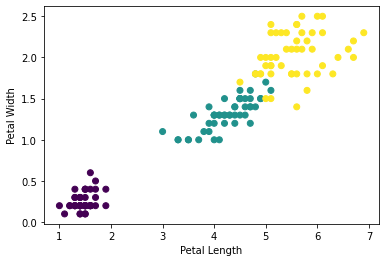

In [284]:
from matplotlib import pyplot as plt
plt.scatter(X[:,0],X[:,1], c=iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [285]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [286]:
dp = np.array([[2,3]])
clf.predict(dp)

array([0])

In [0]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

In [288]:
x_min, x_max, y_min, y_max

(0.0, 7.9, -0.9, 3.5)

In [0]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))


In [290]:
xx.shape

(44, 79)

In [291]:
xx

array([[0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       ...,
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8],
       [0. , 0.1, 0.2, ..., 7.6, 7.7, 7.8]])

In [292]:
yy

array([[-0.9, -0.9, -0.9, ..., -0.9, -0.9, -0.9],
       [-0.8, -0.8, -0.8, ..., -0.8, -0.8, -0.8],
       [-0.7, -0.7, -0.7, ..., -0.7, -0.7, -0.7],
       ...,
       [ 3.2,  3.2,  3.2, ...,  3.2,  3.2,  3.2],
       [ 3.3,  3.3,  3.3, ...,  3.3,  3.3,  3.3],
       [ 3.4,  3.4,  3.4, ...,  3.4,  3.4,  3.4]])

In [295]:
dp = np.c_[xx.ravel(), yy.ravel()]
dp

array([[ 0. , -0.9],
       [ 0.1, -0.9],
       [ 0.2, -0.9],
       ...,
       [ 7.6,  3.4],
       [ 7.7,  3.4],
       [ 7.8,  3.4]])

In [296]:
dp.shape

(3476, 2)

In [0]:
Z = clf.predict(dp)

In [298]:
Z.shape

(3476,)

In [0]:
Z = Z.reshape(xx.shape)

In [300]:
Z.shape

(44, 79)

Text(0, 0.5, 'Petal.Width')

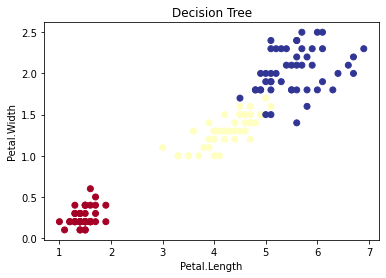

In [301]:
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

Text(0, 0.5, 'Petal.Width')

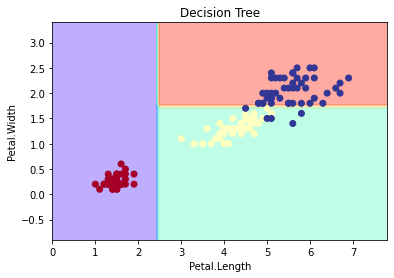

In [302]:
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

## 分類模型 (*Logistic Regression*)

In [303]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
clf.fit(iris.data, iris.target)
clf.predict(iris.data)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [304]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
clf = LogisticRegression()
clf.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))


In [0]:
dp = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(dp)
Z = Z.reshape(xx.shape)

Text(0, 0.5, 'Petal.Width')

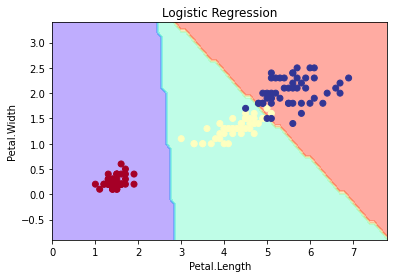

In [308]:
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')

## 模型評估

In [309]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predicted = clf.predict(iris.data)

In [311]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [312]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [315]:
(predicted == iris.target).sum() / len(predicted)

1.0

In [316]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(iris.data, iris.target)
predicted = clf.predict(iris.data)
(predicted == iris.target).sum() / len(predicted)

0.96

In [317]:
clf = LogisticRegression()
clf.fit(iris.data, iris.target)
predicted = clf.predict(iris.data)
(predicted == iris.target).sum() / len(predicted)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9733333333333334

## 分類模型 (*SVM*)

In [319]:
X = iris.data[0:100,[2,3]]
y = iris.target[0:100]

clf1 = SVC(kernel="linear")
clf1.fit(X, y)

clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
def plot_estimator(estimator, X, y, title):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
  np.arange(y_min, y_max, 0.1))
  Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.plot()
  plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
  plt.title(title)
  plt.xlabel('Petal.Length')
  plt.ylabel('Petal.Width')
  plt.show()

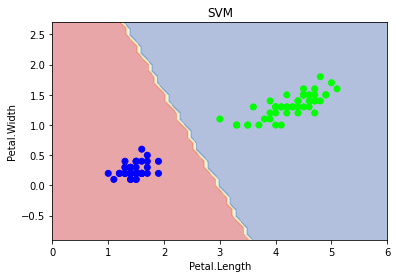

In [321]:
plot_estimator(clf1, X, y, 'SVM')

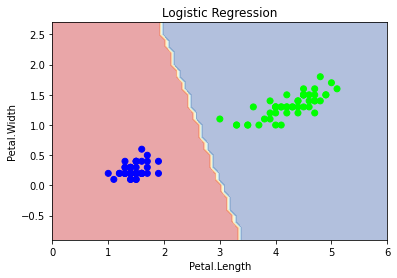

In [323]:
plot_estimator(clf2, X, y, 'Logistic Regression')

In [0]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-
0.4,0.5,1],[2,5,1]])
X = data[:, :2]
Y = data[:,2]

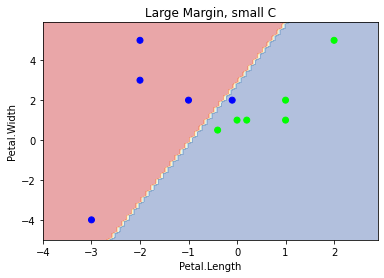

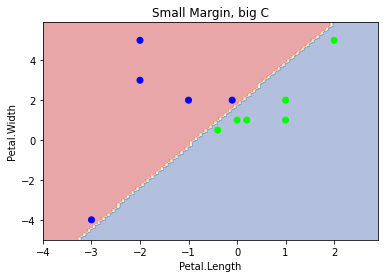

In [328]:
# Large Margin
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y, 'Large Margin, small C')

# Narrow Margin
clf = SVC(C=100000, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y,'Small Margin, big C')

In [0]:
iris = load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [333]:
clf1= SVC(kernel="rbf")
clf1.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [334]:
clf2= SVC(kernel="poly")
clf2.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [335]:
clf3= SVC(kernel="linear")
clf3.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

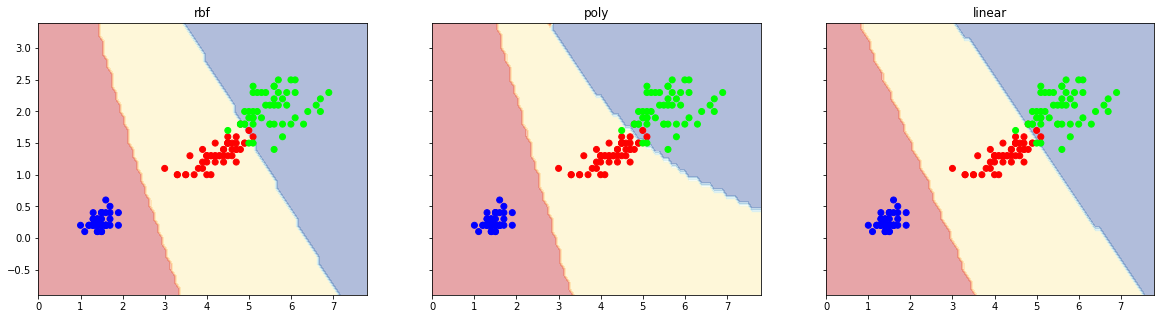

In [336]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))
for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf'
, 'poly', 'linear']):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
  axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
  axarr[idx].set_title(title)


## 分類模型 (*Random Forest*)

In [0]:
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
X = iris.data[:,[0,1]]
y = iris.target

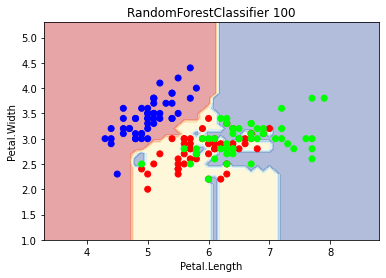

In [338]:
clf = RandomForestClassifier(n_estimators=100,criterion="entropy")
clf.fit(X, y)
plot_estimator(clf, X, y,'RandomForestClassifier 100')

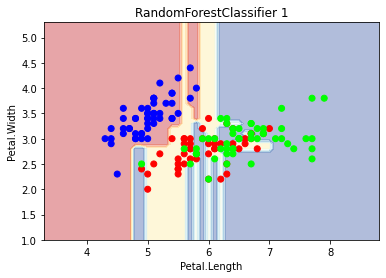

In [339]:
clf = RandomForestClassifier(n_estimators=1,criterion="entropy")
clf.fit(X, y)
plot_estimator(clf, X, y,'RandomForestClassifier 1')

In [340]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = SVC(kernel="rbf")
clf1.fit(X, y)
clf2 = DecisionTreeClassifier()
clf2.fit(X, y)
clf3 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf3.fit(X, y)
clf4 = LogisticRegression()
clf4.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

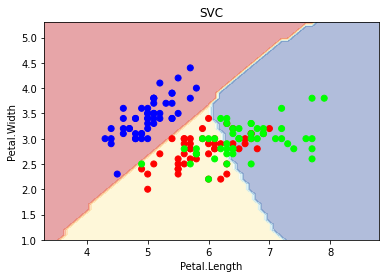

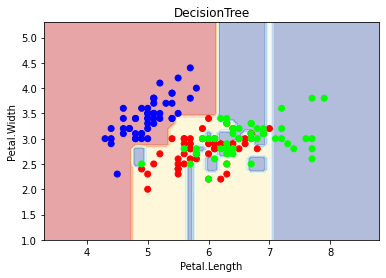

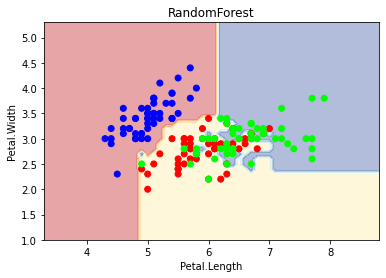

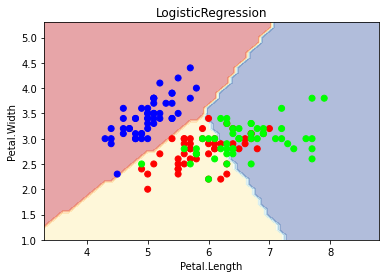

In [341]:
plot_estimator(clf1, X, y, 'SVC')
plot_estimator(clf2, X, y, 'DecisionTree')
plot_estimator(clf3, X, y, 'RandomForest')
plot_estimator(clf4, X, y, 'LogisticRegression')

In [347]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
X = iris.data
y = iris.target

clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = DecisionTreeClassifier(max_depth = 2)
clf2.fit(X, y)

clf3 = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf3.fit(X, y)

clf4 = LogisticRegression()
clf4.fit(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [348]:
from sklearn.metrics import accuracy_score
predicted = clf1.predict(X)
accuracy_score(y, predicted)


0.9733333333333334

In [349]:
predicted = clf2.predict(X)
accuracy_score(y, predicted)

0.96

In [350]:
predicted = clf3.predict(X)
accuracy_score(y, predicted)

0.9933333333333333

In [351]:
predicted = clf4.predict(X)
accuracy_score(y, predicted)

0.9733333333333334